In [290]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [291]:
# Load the dataset
users = pd.read_csv("data/users.csv")
users

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator
0,4b0625b0e19a11ec8a541fcc86ad2588,2022-06-01 11:03:06.000000,C,NaN,NaN,aff_4,2022-06-01 12:23:34.000000,ps,ABC
1,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC
2,a0b80170e1b011ec8a541fcc86ad2588,2022-06-01 13:42:29.000000,C,Android,9.0,aff_4,NaN,ma,ABC
3,91299d70e1d511ec8a541fcc86ad2588,2022-06-01 18:09:04.000000,B,iOS,15.4,aff_4,2022-06-15 08:24:58.000000,ps,ABC
4,ee930990e1fa11ecb2988337303a8fef,2022-06-01 22:35:02.000000,C,Android,6.0,aff_4,NaN,ma,ABC
...,...,...,...,...,...,...,...,...,...
14820,32478440f65a11ec9858f182f68e7036,2022-06-27 20:48:04.000000,B,iOS,15.5,aff_4,2022-07-11 06:51:02.000000,gc,ABC
14821,3c32cff0f79a11eca4a103a479708082,2022-06-29 10:57:38.000000,A,iOS,15.5,aff_2,2022-07-13 14:35:25.000000,tv,ABC
14822,a3e36700e9e311ec9af991325ed16c0b,2022-06-12 00:09:38.000000,B,Android,11.0,aff_4,2022-07-17 13:11:31.000000,ps,ABC
14823,8b26c8d0ea5411ec9af991325ed16c0b,2022-06-12 13:36:54.000000,B,Android,10.0,aff_4,2022-07-17 11:46:10.000000,cl,ABC


In [292]:
# Count the amount of null values
users.isnull().sum()

user_id                   0
subscription_date         0
phone_operator            0
os_name                 206
os_version              208
affiliate                52
unsubscription_date    7891
service                   0
aggregator                0
dtype: int64

### The null Values are less than 10% so we will remove it. unsubscription_date has been kept as null for this column is meaningful

In [293]:
# remove null values
users = users.dropna(subset=users.columns.difference(['unsubscription_date']))
users

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator
1,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC
2,a0b80170e1b011ec8a541fcc86ad2588,2022-06-01 13:42:29.000000,C,Android,9.0,aff_4,NaN,ma,ABC
3,91299d70e1d511ec8a541fcc86ad2588,2022-06-01 18:09:04.000000,B,iOS,15.4,aff_4,2022-06-15 08:24:58.000000,ps,ABC
4,ee930990e1fa11ecb2988337303a8fef,2022-06-01 22:35:02.000000,C,Android,6.0,aff_4,NaN,ma,ABC
5,2414d890e25b11ecae2c8b58f62b8645,2022-06-02 10:03:12.000000,B,Android,11.0,aff_4,2022-06-24 07:56:03.000000,ps,ABC
...,...,...,...,...,...,...,...,...,...
14820,32478440f65a11ec9858f182f68e7036,2022-06-27 20:48:04.000000,B,iOS,15.5,aff_4,2022-07-11 06:51:02.000000,gc,ABC
14821,3c32cff0f79a11eca4a103a479708082,2022-06-29 10:57:38.000000,A,iOS,15.5,aff_2,2022-07-13 14:35:25.000000,tv,ABC
14822,a3e36700e9e311ec9af991325ed16c0b,2022-06-12 00:09:38.000000,B,Android,11.0,aff_4,2022-07-17 13:11:31.000000,ps,ABC
14823,8b26c8d0ea5411ec9af991325ed16c0b,2022-06-12 13:36:54.000000,B,Android,10.0,aff_4,2022-07-17 11:46:10.000000,cl,ABC


In [294]:
# read transactions data
transactions = pd.read_csv("data/transactions.tsv", sep='\t')
transactions

,user_id,transaction_timestamp,service,phone_operator,status,pricepoint
0,ad54a2e0e16e11ec95703f2faa3b39a3,2022-06-01 05:50:48.000000,ma,C,Failed,3.6
1,f0769510e19611ecb2988337303a8fef,2022-06-01 10:38:53.000000,ps,A,Failed,3.6
2,3c7b02e0e1a911ec8a541fcc86ad2588,2022-06-01 12:50:41.000000,cl,A,Failed,3.6
3,bf9b25f0e1e111ecbaa51f9ae3f5945d,2022-06-01 19:34:40.000000,ma,A,Delivered,3.6
4,06d76e40e1fd11ec8a541fcc86ad2588,2022-06-01 22:49:27.000000,tv,B,Failed,3.6
...,...,...,...,...,...,...
62872,42c8f150e1dd11ecb2988337303a8fef,2022-07-27 05:32:32.000000,ma,C,Failed,3.6
62873,0b54db30ece111ecbc89495b27b9c9c5,2022-07-27 05:32:32.000000,cl,C,Failed,3.6
62874,a3f3ea70f23611ec98339db181f14dac,2022-07-27 05:32:32.000000,ps,C,Failed,3.6
62875,4087d2f0e71711ec9af991325ed16c0b,2022-07-27 05:34:32.000000,ma,A,Failed,3.6


In [295]:
# Count the amount of null values
transactions.isnull().sum()

user_id                  0
transaction_timestamp    0
service                  0
phone_operator           0
status                   1
pricepoint               0
dtype: int64

In [296]:
# remove null values
transactions = transactions.dropna(subset=transactions.columns.difference(['unsubscription_date']))
transactions

,user_id,transaction_timestamp,service,phone_operator,status,pricepoint
0,ad54a2e0e16e11ec95703f2faa3b39a3,2022-06-01 05:50:48.000000,ma,C,Failed,3.6
1,f0769510e19611ecb2988337303a8fef,2022-06-01 10:38:53.000000,ps,A,Failed,3.6
2,3c7b02e0e1a911ec8a541fcc86ad2588,2022-06-01 12:50:41.000000,cl,A,Failed,3.6
3,bf9b25f0e1e111ecbaa51f9ae3f5945d,2022-06-01 19:34:40.000000,ma,A,Delivered,3.6
4,06d76e40e1fd11ec8a541fcc86ad2588,2022-06-01 22:49:27.000000,tv,B,Failed,3.6
...,...,...,...,...,...,...
62872,42c8f150e1dd11ecb2988337303a8fef,2022-07-27 05:32:32.000000,ma,C,Failed,3.6
62873,0b54db30ece111ecbc89495b27b9c9c5,2022-07-27 05:32:32.000000,cl,C,Failed,3.6
62874,a3f3ea70f23611ec98339db181f14dac,2022-07-27 05:32:32.000000,ps,C,Failed,3.6
62875,4087d2f0e71711ec9af991325ed16c0b,2022-07-27 05:34:32.000000,ma,A,Failed,3.6


In [297]:
# join two dataset together
dataset = pd.merge(users, transactions, on='user_id', how='inner',suffixes=('', '_transactions'))
dataset = dataset.filter(regex='^(?!.*_transactions$)')
dataset

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator,transaction_timestamp,status,pricepoint
0,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC,2022-06-01 11:32:06.000000,Failed,3.6
1,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC,2022-06-08 05:16:32.000000,Failed,3.6
2,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC,2022-07-27 05:31:32.000000,Failed,3.6
3,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC,2022-06-15 05:16:32.000000,Delivered,3.6
4,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC,2022-06-22 05:16:32.000000,Failed,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
61835,e82948a0f01211ec989b6b01af70e4c0,2022-06-19 21:02:30.000000,C,Android,9.0,aff_4,2022-07-24 07:09:18.000000,ps,ABC,2022-06-26 05:17:32.000000,Delivered,3.6
61836,e82948a0f01211ec989b6b01af70e4c0,2022-06-19 21:02:30.000000,C,Android,9.0,aff_4,2022-07-24 07:09:18.000000,ps,ABC,2022-07-03 05:17:32.000000,Delivered,3.6
61837,e82948a0f01211ec989b6b01af70e4c0,2022-06-19 21:02:30.000000,C,Android,9.0,aff_4,2022-07-24 07:09:18.000000,ps,ABC,2022-07-10 05:32:32.000000,Delivered,3.6
61838,e82948a0f01211ec989b6b01af70e4c0,2022-06-19 21:02:30.000000,C,Android,9.0,aff_4,2022-07-24 07:09:18.000000,ps,ABC,2022-07-17 05:32:32.000000,Delivered,3.6


In [298]:
dataset.isnull().sum()

user_id                      0
subscription_date            0
phone_operator               0
os_name                      0
os_version                   0
affiliate                    0
unsubscription_date      49846
service                      0
aggregator                   0
transaction_timestamp        0
status                       0
pricepoint                   0
dtype: int64

In [299]:
# fix the data type
dataset['subscription_date'] = pd.to_datetime(dataset['subscription_date'])
dataset['unsubscription_date'] = pd.to_datetime(dataset['unsubscription_date'])
dataset['transaction_timestamp'] = pd.to_datetime(dataset['transaction_timestamp'])
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
users['unsubscription_date'] = pd.to_datetime(users['unsubscription_date'])

/tmp/ipykernel_5729/4240073587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['subscription_date'] = pd.to_datetime(users['subscription_date'])
/tmp/ipykernel_5729/4240073587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['unsubscription_date'] = pd.to_datetime(users['unsubscription_date'])


### The two datasets are clean amd we inner joined them. So now we have a nice and clean dataset to start our EDA.

/tmp/ipykernel_5729/3710320190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['subscription_duration'] = (users['unsubscription_date'] - users['subscription_date']).dt.days


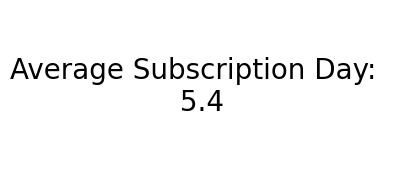

In [300]:
# Calculate subscription duration for each user
users['subscription_duration'] = (users['unsubscription_date'] - users['subscription_date']).dt.days
# Calculate the average subscription duration
average_subscription_duration = round(users['subscription_duration'].mean(), 1)
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'Average Subscription Day: \n {average_subscription_duration}', fontsize=20, ha='center', va='center')
plt.axis('off')  # Turn off the axes
plt.show()

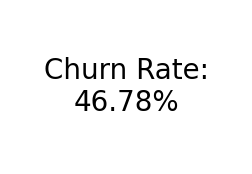

In [301]:
# remove month 7 because we have no info of registered users in month 7 so it has negative effect
filtered_users = users[~((users['unsubscription_date'].dt.month == 7) & (users['unsubscription_date'].dt.year == 2023))]

# Calculate churn rate
churn_rate = (filtered_users['unsubscription_date'].notnull().sum() / len(filtered_users)) * 100
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'Churn Rate:\n{churn_rate:.2f}%', fontsize=20, ha='center', va='center')
plt.axis('off')  # Turn off the axes
plt.show()

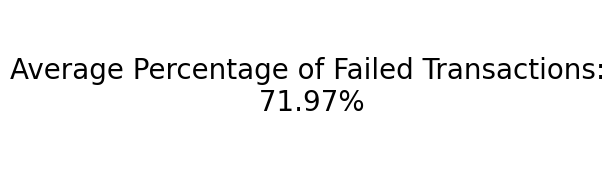

In [302]:
# Calculate the percentage of failure for each transaction
dataset['failure_percentage'] = (dataset['status'] == 'Failed').astype(int) * 100
average_failure_percentage = dataset['failure_percentage'].mean()
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'Average Percentage of Failed Transactions:\n {average_failure_percentage:.2f}%', fontsize=20, ha='center', va='center')
plt.axis('off')  # Turn off the axes
plt.show()

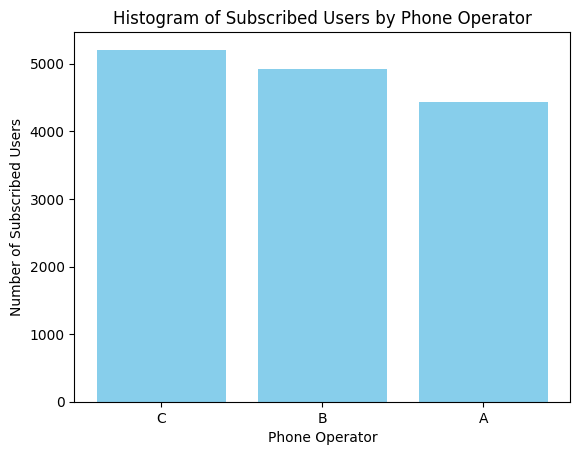

In [303]:
# Plotting the number of users for each operator
operator_counts = users['phone_operator'].value_counts()
plt.bar(operator_counts.index, operator_counts.values, color='skyblue')
plt.xlabel('Phone Operator')
plt.ylabel('Number of Subscribed Users')
plt.title('Histogram of Subscribed Users by Phone Operator')
plt.show()


/tmp/ipykernel_5729/1261039431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['subscription_date'] = pd.to_datetime(users['subscription_date'])


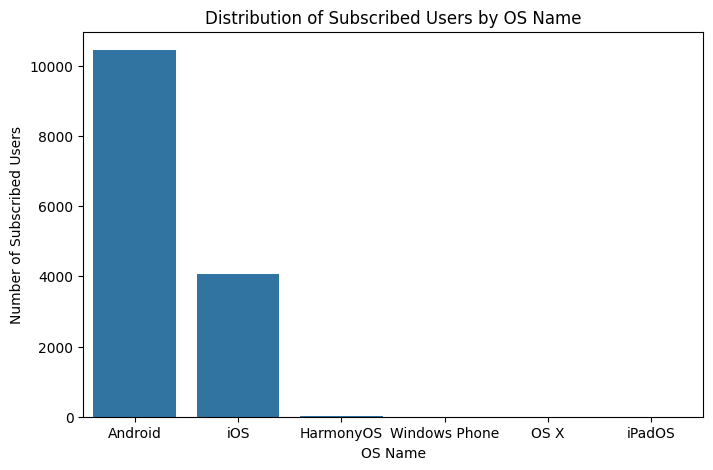

In [304]:
# Most used os for our customers
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
plt.figure(figsize=(8, 5))
sns.countplot(x='os_name', data=users)
plt.xlabel('OS Name')
plt.ylabel('Number of Subscribed Users')
plt.title('Distribution of Subscribed Users by OS Name')
plt.show()


### Majority of our customers are using operator C and android users

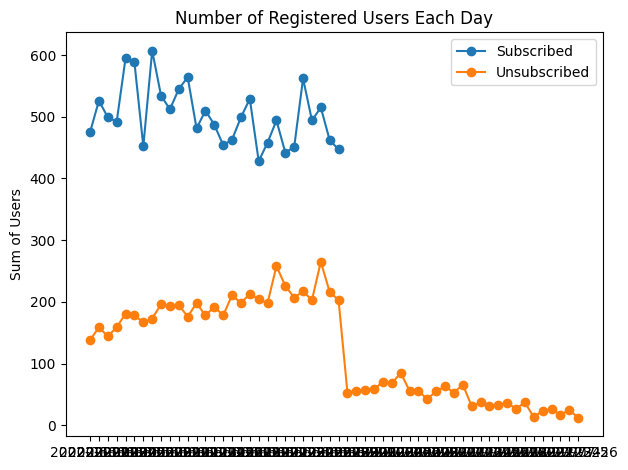

In [305]:
# compare of sub and unsubscription rate over time
daily_user_counts = users.groupby(users['subscription_date'].dt.to_period("D")).size() 
un_daily_user_counts = users.groupby(users['unsubscription_date'].dt.to_period("D")).size() 
combined_counts = pd.concat([daily_user_counts, un_daily_user_counts], axis=1, keys=['Subscribed', 'Unsubscribed'])
plt.plot(combined_counts.index.astype(str), combined_counts['Subscribed'].values, marker='o', linestyle='-', label='Subscribed')
plt.plot(combined_counts.index.astype(str), combined_counts['Unsubscribed'].values, marker='o', linestyle='-', label='Unsubscribed')
plt.title('Number of Registered Users Each Day')
plt.ylabel('Sum of Users')
plt.tight_layout()
plt.legend()
plt.show()

### The trend line for subscribed users is higher than unsubscribed so we can say most of our users subscribed in this month and number of unsubscription in the next month has dropped 

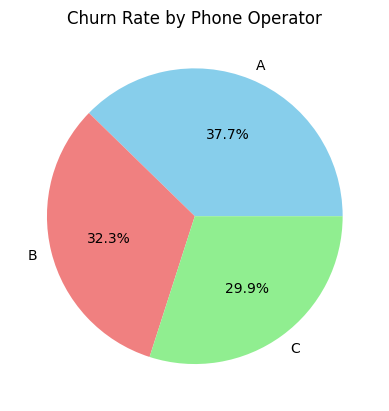

In [306]:
# churn by operators
churn_by_operator = users.groupby('phone_operator')['unsubscription_date'].count() / users.groupby('phone_operator')['user_id'].count() * 100

plt.pie(churn_by_operator, labels=churn_by_operator.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by Phone Operator')
plt.show()


/tmp/ipykernel_5729/2909851382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['subscription_duration'] = users['unsubscription_date'] - users['subscription_date']
/tmp/ipykernel_5729/2909851382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['subscription_duration_days'] = users['subscription_duration'].dt.days


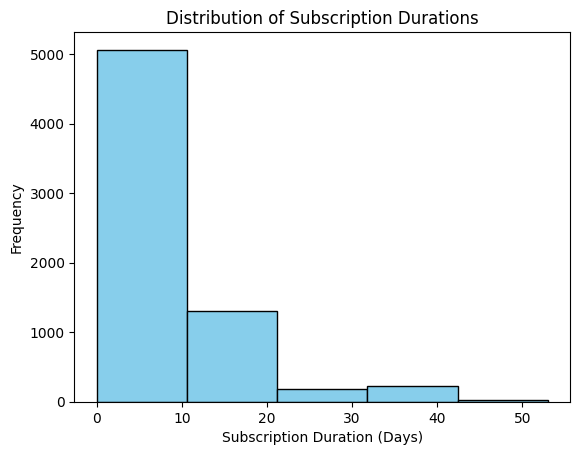

In [307]:
# Calculate subscription durations
users['subscription_duration'] = users['unsubscription_date'] - users['subscription_date']
users['subscription_duration_days'] = users['subscription_duration'].dt.days
plt.hist(users['subscription_duration_days'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Subscription Duration (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Durations')
plt.show()

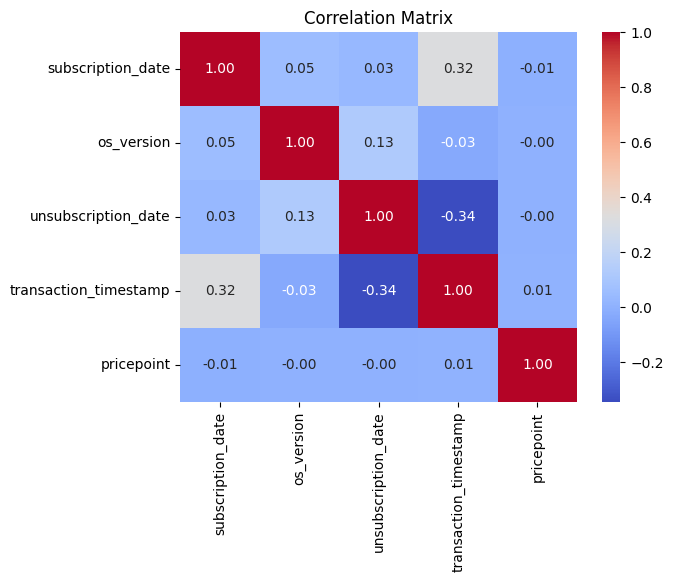

In [308]:
# Calculate the correlation matrix
correlation_matrix = dataset[['subscription_date', 'os_version', 'unsubscription_date', 'transaction_timestamp', 'pricepoint']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### As we see there is a correlation between unsubscription and os_version

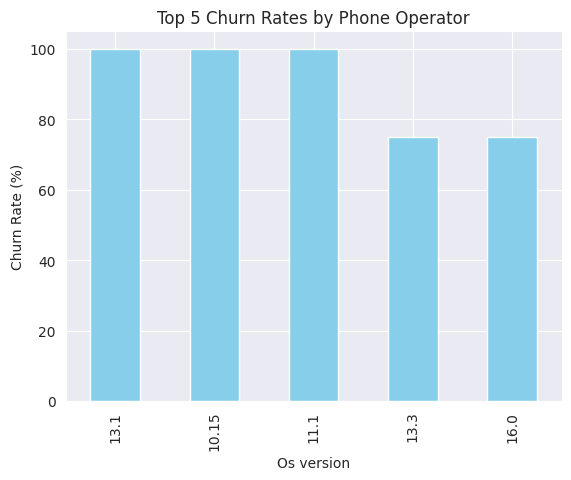

In [317]:
# most churned os versions
churn_by_os = users.groupby('os_version')['unsubscription_date'].count() / users.groupby('os_version')['user_id'].count() * 100
top5_churn_by_os = churn_by_os.sort_values(ascending=False).head(5)

# Plot the bar chart for the top 5 phone operators
top5_churn_by_os.plot(kind='bar', color='skyblue')
plt.xlabel('Os version')
plt.ylabel('Churn Rate (%)')
plt.title('Top 5 Churn Rates by Phone Operator')
plt.show()

### so there is a problem with iphone 10,11,13 

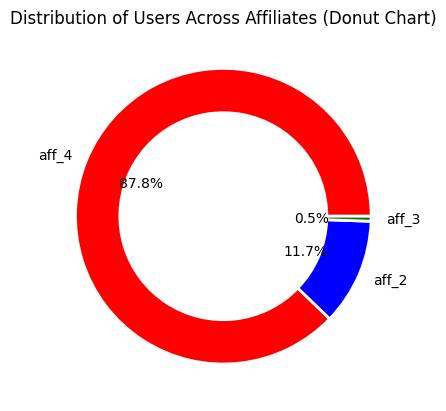

In [310]:
# Calculate user distribution across affiliates
affiliate_distribution = users['affiliate'].value_counts()
plt.pie(affiliate_distribution, labels=affiliate_distribution.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2), colors=['red', 'blue', 'green'])
plt.title('Distribution of Users Across Affiliates (Donut Chart)')
plt.show()

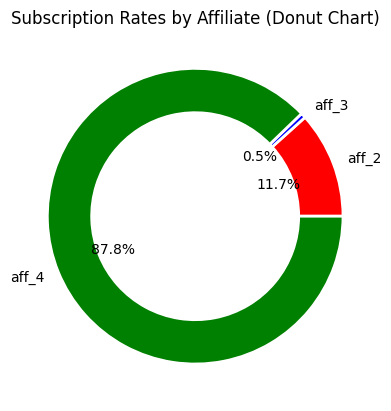

In [311]:
# Calculate subscription rates by affiliate
subscription_rates = users.groupby('affiliate')['user_id'].count() / len(users) * 100
plt.pie(subscription_rates, labels=subscription_rates.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2), colors=['red','blue','green'])
plt.title('Subscription Rates by Affiliate (Donut Chart)')
plt.show()

/tmp/ipykernel_5729/1770011202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service', data=users, palette='viridis')


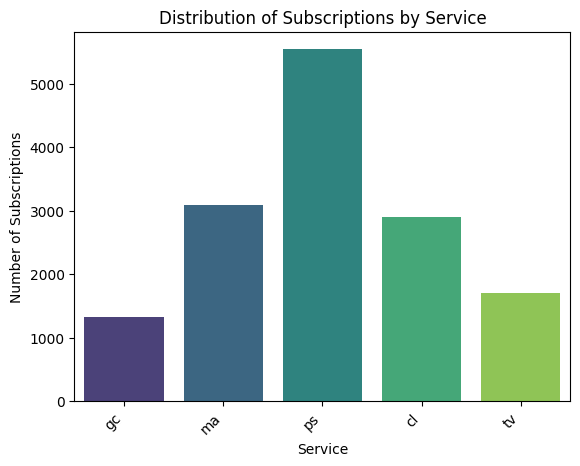

In [312]:
# subscription by service point
sns.countplot(x='service', data=users, palette='viridis')
plt.title('Distribution of Subscriptions by Service')
plt.xlabel('Service')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

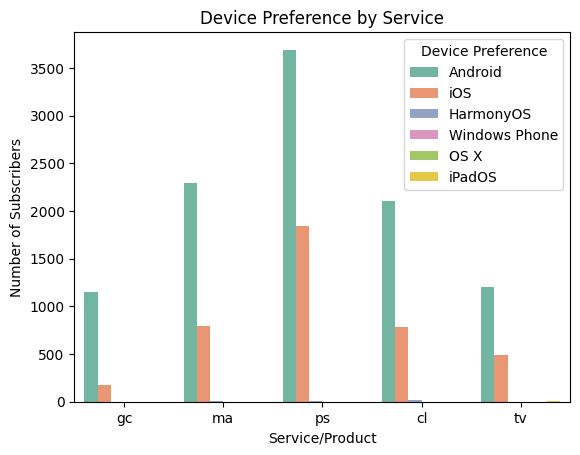

In [313]:
# Device Preference by Service
sns.countplot(x='service', hue='os_name', data=users, palette='Set2')
plt.title('Device Preference by Service')
plt.xlabel('Service/Product')
plt.ylabel('Number of Subscribers')
plt.legend(title='Device Preference')
plt.show()

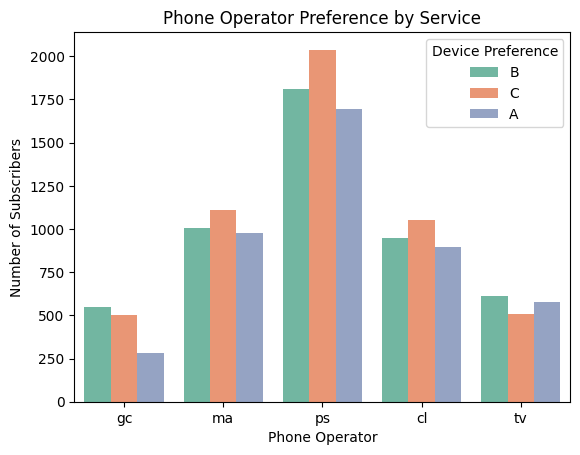

In [314]:
# Phone Operator Preference by Service
sns.countplot(x='service', hue='phone_operator', data=users, palette='Set2')
plt.title('Phone Operator Preference by Service')
plt.xlabel('Phone Operator')
plt.ylabel('Number of Subscribers')
plt.legend(title='Device Preference')
plt.show()

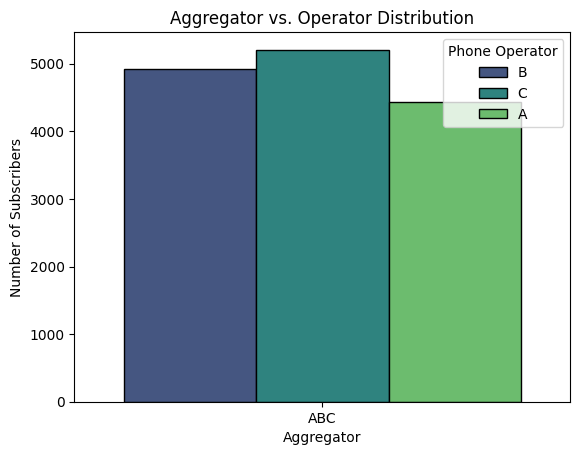

In [315]:
# Create a stacked bar chart for Aggregator vs. Operator Distribution
sns.countplot(x='aggregator', hue='phone_operator', data=users, palette='viridis', edgecolor='k')
plt.title('Aggregator vs. Operator Distribution')
plt.xlabel('Aggregator')
plt.ylabel('Number of Subscribers')
plt.legend(title='Phone Operator')
plt.show()


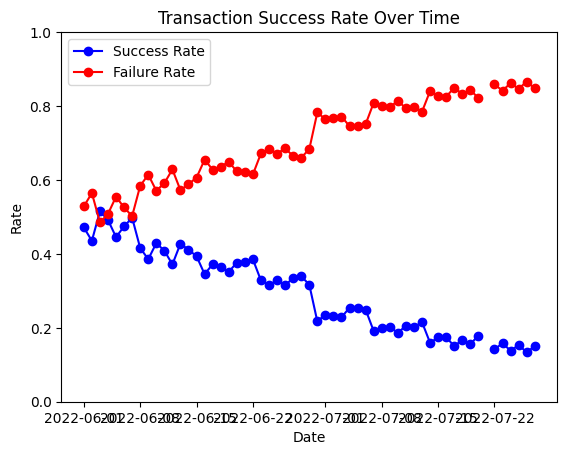

In [316]:
# Calculate the daily transaction success rate
daily_success_rate = (dataset[dataset['status'] == 'Delivered'].resample('D', on='transaction_timestamp').size() / dataset.resample('D', on='transaction_timestamp').size())
daily_unsuccess_rate = (dataset[dataset['status'] == 'Failed'].resample('D', on='transaction_timestamp').size() / dataset.resample('D', on='transaction_timestamp').size())
plt.plot(daily_success_rate.index, daily_success_rate, marker='o', linestyle='-', color='b', label='Success Rate')
plt.plot(daily_unsuccess_rate.index, daily_unsuccess_rate, marker='o', linestyle='-', color='r', label='Failure Rate')
plt.title('Transaction Success Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.ylim(0, 1)  # Set y-axis limit to represent percentages (0-100%)
plt.legend()
plt.show()